# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and exploratory data analysis. In order to complete this lab, you'll have to import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
- Use different types of joins to merge DataFrames 
- Identify missing values in a dataframe using built-in methods 
- Evaluate and execute the best strategy for dealing with missing, duplicate, and erroneous values for a given dataset 
- Inspect data for duplicates or extraneous values and remove them 


## The dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!


## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources -- `'heroes_information.csv'` and `'super_hero_powers.csv'`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the `.head()` of each to ensure that everything loaded correctly.  

In [113]:
heroes_df = pd.read_csv('heroes_information.csv')
powers_df = pd.read_csv('super_hero_powers.csv')

In [114]:
heroes_df.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [115]:
powers_df.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [116]:
h_df = heroes_df.drop('Unnamed: 0', axis=1)
h_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [117]:
h_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        734 non-null    object 
 1   Gender      734 non-null    object 
 2   Eye color   734 non-null    object 
 3   Race        734 non-null    object 
 4   Hair color  734 non-null    object 
 5   Height      734 non-null    float64
 6   Publisher   719 non-null    object 
 7   Skin color  734 non-null    object 
 8   Alignment   734 non-null    object 
 9   Weight      732 non-null    float64
dtypes: float64(2), object(8)
memory usage: 57.5+ KB


In [118]:
# renaming the dataframe to something easier to type
p_df = powers_df

## Familiarize yourself with the dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesn't contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [119]:
h_df.shape

(734, 10)

In [120]:
h_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        734 non-null    object 
 1   Gender      734 non-null    object 
 2   Eye color   734 non-null    object 
 3   Race        734 non-null    object 
 4   Hair color  734 non-null    object 
 5   Height      734 non-null    float64
 6   Publisher   719 non-null    object 
 7   Skin color  734 non-null    object 
 8   Alignment   734 non-null    object 
 9   Weight      732 non-null    float64
dtypes: float64(2), object(8)
memory usage: 57.5+ KB


In [121]:
p_df.shape

(667, 168)

In [122]:
len(p_df.columns)

168

## Dealing with missing values

Starting in the cell below, detect and deal with any missing values in either DataFrame. Then, explain your methodology for detecting and dealing with outliers in the markdown section below. Be sure to explain your strategy for dealing with missing values in numeric columns, as well as your strategy for dealing with missing values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________
It seems there are some missing in publisher and weight.

1. Look for Nan
`h_df.isna().sum()`
2. Find the values in publisher that are currently there.
3. I'm going replace them all with "unknown"


In [123]:
h_df.isna().sum()

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

In [124]:
h_df.Publisher.nunique()

24

In [125]:
h_df.Publisher.value_counts()

Marvel Comics        388
DC Comics            215
NBC - Heroes          19
Dark Horse Comics     18
Image Comics          14
George Lucas          14
Star Trek              6
HarperCollins          6
Team Epic TV           5
SyFy                   5
IDW Publishing         4
Shueisha               4
Icon Comics            4
ABC Studios            4
Wildstorm              3
Sony Pictures          2
J. R. R. Tolkien       1
Rebellion              1
Universal Studios      1
Titan Books            1
South Park             1
J. K. Rowling          1
Microsoft              1
Hanna-Barbera          1
Name: Publisher, dtype: int64

In [126]:
h_df[h_df.Publisher.isnull()].head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
46,Astro Boy,Male,brown,-,Black,-99.0,NaN,-,good,-99.0
86,Bionic Woman,Female,blue,Cyborg,Black,-99.0,NaN,-,good,-99.0
138,Brundlefly,Male,-,Mutant,-,193.0,NaN,-,-,-99.0
175,Chuck Norris,Male,-,-,-,178.0,NaN,-,good,-99.0
204,Darkside,-,-,-,-,-99.0,NaN,-,bad,-99.0


In [127]:
#def unknown(value):
 #   if value == float('nan'):
  #      return "Unknown"
#h_df.Publisher = h_df.Publisher.map(lambda x: unknown(x))
h_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [128]:
def unknown(value):
    if value == None:
        return "Unknown"
    else:
        return value
h_df.Publisher = h_df.Publisher.map(lambda x: unknown(x))


In [129]:
h_df.Publisher.isna().sum()

15

In [130]:
mean_weight = h_df.Weight.mean()

In [131]:
h_df.Weight.fillna(mean_weight, inplace=True)
h_df.isna().sum()

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         0
dtype: int64

In [132]:
h_df.Publisher.fillna("Unknown", inplace=True)
h_df.isna().sum()

name          0
Gender        0
Eye color     0
Race          0
Hair color    0
Height        0
Publisher     0
Skin color    0
Alignment     0
Weight        0
dtype: int64

## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** Consider the possibility that the columns you choose to join on contain duplicate entries. If that is the case, devise a strategy to deal with the duplicates.

**_HINT:_** If the join throws an error message, consider setting the column you want to join on as the index for each DataFrame.  

In [133]:
p_df.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [134]:
p_df.rename(columns={"hero_names": "name"}, inplace=True)


In [135]:
hero_power_df = pd.concat([h_df, p_df], axis=1, join="inner")

In [136]:
h_df.shape

(734, 10)

In [137]:
p_df.shape

(667, 168)

In [138]:
hero_power_df.shape

(667, 178)

In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

In [139]:
male_heroes_df = h_df[h_df.Gender == 'Male']
female_heroes_df = None

In [140]:
male_heroes_df = h_df[h_df.Gender == 'Male'] 

In [141]:
male_heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [142]:
female_heroes_df = h_df[h_df.Gender == 'Female']
female_heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
8,Agent 13,Female,blue,-,Blond,173.0,Marvel Comics,-,good,61.0
24,Angel Dust,Female,yellow,Mutant,Black,165.0,Marvel Comics,-,good,57.0
25,Angel Salvadore,Female,brown,-,Black,163.0,Marvel Comics,-,good,54.0
26,Angela,Female,-,-,-,-99.0,Image Comics,-,bad,-99.0
38,Arachne,Female,blue,Human,Blond,175.0,Marvel Comics,-,good,63.0


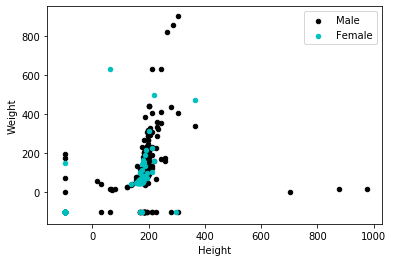

In [143]:
ax = male_heroes_df.plot.scatter(x='Height', y='Weight', c='k', label='Male')
female_heroes_df.plot.scatter(x='Height', y='Weight', c='c', label='Female', ax=ax)

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot()` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [144]:



def show_distplot(dataframe, gender, column_name):
    plt.plot()
    dataframe[column_name].hist()
    plt.title('Distribution of {} for {} heroes'.format(column_name, gender))
    plt.xlabel(column_name)
    plt.ylabel('Probability Density')
    plt.show()

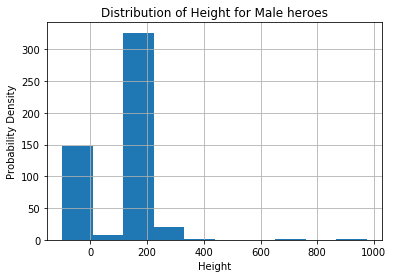

Mean height for male heroes: 107.27524752475247
Median height for male heroes: 180.0


In [145]:
# Male Height
# Male Height
show_distplot(male_heroes_df, 'Male', 'Height')
print('Mean height for male heroes: {}'.format(male_heroes_df.Height.mean()))
print('Median height for male heroes: {}'.format(male_heroes_df.Height.median()))

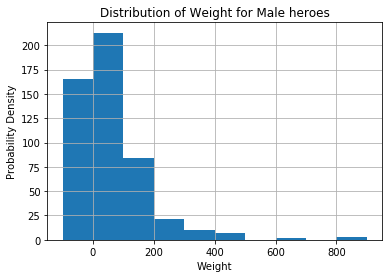

Mean weight for male heroes: 52.03535681436996
Median weight for male heroes: 79.0


In [146]:
# Male Weight
show_distplot(male_heroes_df, 'Male', 'Weight')
print('Mean weight for male heroes: {}'.format(male_heroes_df.Weight.mean()))
print('Median weight for male heroes: {}'.format(male_heroes_df.Weight.median()))

In [147]:
# Female Height


In [148]:
# Female Weight


Discuss your findings from the plots above, with respect to the distribution of height and weight by gender.  Your explanation should include a discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Write your answer below this line:
____________________________________________________________________________________________________________________________



### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [149]:
p_df.Agility[p_df.Agility == True].count()

242

In [150]:
power_count = {}
powers=list(p_df)[1:]
for power in powers:
    num = p_df[power][p_df[power] == True].count()
    power_count[power] = num
power_count = sorted(power_count.items(), key = lambda x: x[1], reverse=True)
top_five_powers = list(power_count)[0:5]
top_five_powers

[('Super Strength', 360),
 ('Stamina', 289),
 ('Durability', 257),
 ('Super Speed', 249),
 ('Agility', 242)]

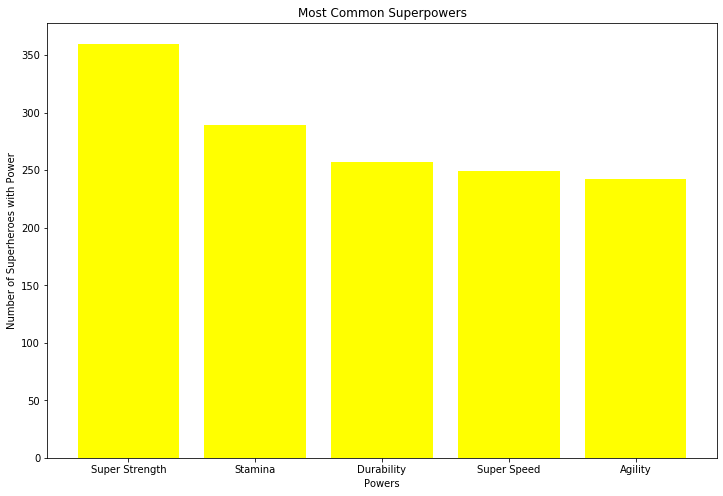

In [151]:
all_x_axis = [x[0] for x in top_five_powers]
all_y_axis = [x[1] for x in top_five_powers]
plt.figure(figsize=(12,8))
plt.bar(all_x_axis, all_y_axis, color="yellow")

plt.title("Most Common Superpowers")
plt.xlabel("Powers")
plt.ylabel("Number of Superheroes with Power")
plt.show()

In [152]:
marvel_power_df = hero_power_df.loc[hero_power_df.Publisher == "Marvel Comics"]

In [154]:
marvel_power_df = marvel_power_df.drop(h_df.columns, axis=1)


In [155]:
marvel_power_df.head()

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,True,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [40]:
# dropping all the columns that don't have powers
# m_power_df = marvel_power_df.drop(marvel_power_df.columns[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]], axis=1) 

In [156]:
m_power_df.head()

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,True,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [157]:
m_power_count = {}
m_powers=list(m_power_df)
for power in m_powers:
    num = m_power_df[power][m_power_df[power] == True].count()
    m_power_count[power] = num
m_power_count = sorted(m_power_count.items(), key = lambda x: x[1], reverse=True)
top_five_m_powers = list(m_power_count)[0:5]
top_five_m_powers

[('Super Strength', 194),
 ('Stamina', 142),
 ('Durability', 138),
 ('Super Speed', 131),
 ('Agility', 113)]

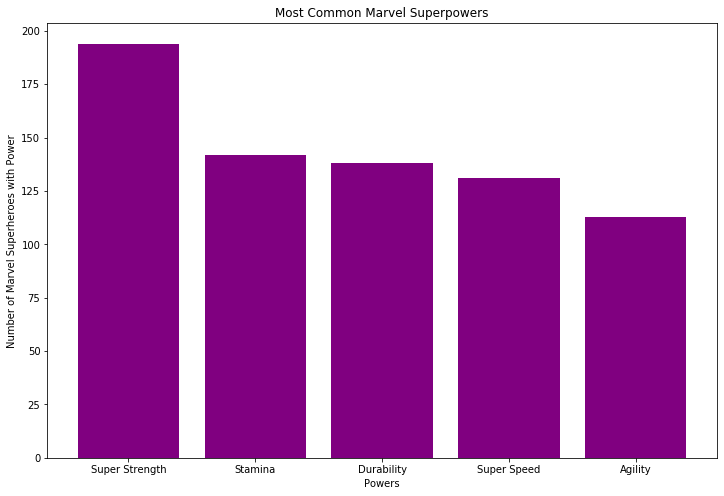

In [158]:
m_x_axis = [x[0] for x in top_five_m_powers]
m_y_axis = [x[1] for x in top_five_m_powers]
plt.figure(figsize=(12,8))
plt.bar(m_x_axis, m_y_axis, color="purple")

plt.title("Most Common Marvel Superpowers")
plt.xlabel("Powers")
plt.ylabel("Number of Marvel Superheroes with Power")
plt.show()

In [159]:
dc_power_df = hero_power_df.loc[hero_power_df.Publisher == "DC Comics"]

In [160]:
dc_power_count = {}
dc_powers=list(m_power_df)
for power in dc_powers:
    num = dc_power_df[power][dc_power_df[power] == True].count()
    dc_power_count[power] = num
dc_power_count = sorted(dc_power_count.items(), key = lambda x: x[1], reverse=True)
top_five_dc_powers = list(dc_power_count)[0:5]
top_five_dc_powers

[('Super Strength', 97),
 ('Stamina', 91),
 ('Agility', 81),
 ('Durability', 76),
 ('Super Speed', 75)]

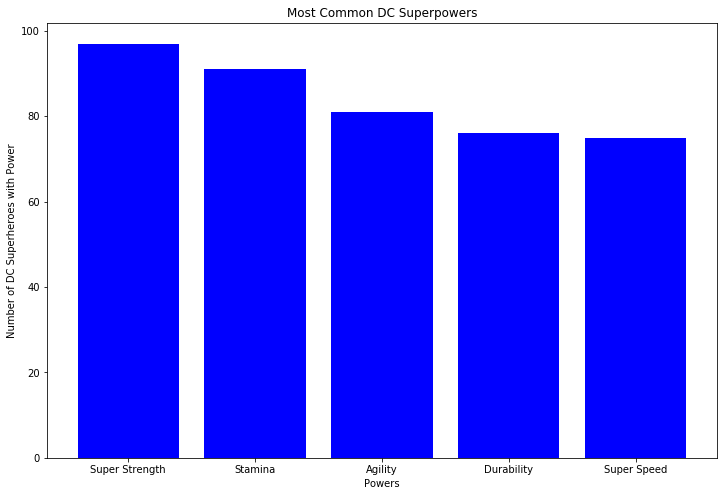

In [161]:
dc_x_axis = [x[0] for x in top_five_dc_powers]
dc_y_axis = [x[1] for x in top_five_dc_powers]
plt.figure(figsize=(12,8))
plt.bar(dc_x_axis, dc_y_axis, color="blue")

plt.title("Most Common DC Superpowers")
plt.xlabel("Powers")
plt.ylabel("Number of DC Superheroes with Power")
plt.show()

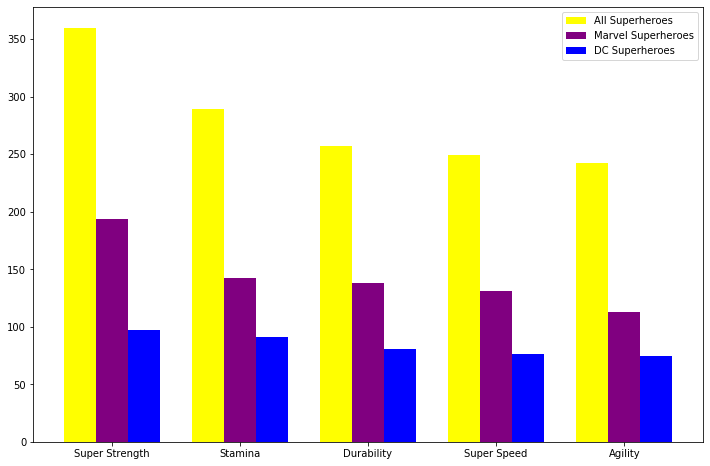

In [162]:
barWidth = 0.25
r1 = np.arange(len(all_x_axis))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
plt.figure(figsize=(12,8))
plt.bar(r1, all_y_axis,width=barWidth, label="All Superheroes", color="yellow")
plt.bar(r2, m_y_axis,width=barWidth, label="Marvel Superheroes", color="purple")
plt.bar(r3, dc_y_axis,width=barWidth, label="DC Superheroes", color="blue")


plt.xticks([r + barWidth for r in range(len(all_x_axis))], all_x_axis)
plt.legend()
plt.show()

In [163]:
h_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [165]:
h_df.groupby('Gender').mean().Weight

Gender
-         15.822593
Female    27.265000
Male      52.035357
Name: Weight, dtype: float64

In [167]:
p_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, name to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB


Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Write your answer below this line:
____________________________________________________________________________________________________________________________


### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________



Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data